# PART TWO: MODELING AND TESTING

# Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))#to expand the size of my container so it can take fill up my entire monitor

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina' #to enable higher quality plots on retina displays
pd.options.display.max_rows = 200 #increasing maximum viewable rows and columns
pd.options.display.max_columns = 200

# TABLE OF CONTENTS

<a id='table_of_contents'></a><br>
[Section 1: Model Evaluation](#section_1)<br>
[Section 2: Cleaning the Testing Data](#section_2)<br>
[Section 3: Prediction Time](#section_3)<br>

[Take me back to Part 1](../code/1_data_cleaning_and_eda.ipynb)

<a id='section_1'></a>
# SECTION 1: MODEL EVALUATION

<a id='section_1_table_of_contents'></a>
## <b>Section 1 Table of Contents</b>
[1.1 Linear Regression](#section_1_1)<br>
[1.2 Lasso](#section_1_2)<br>
[1.3 Ridge](#section_1_3)<br>
[1.4 KNN](#section_1_4)<br>
[1.5 Final Model Selection](#section_1_5)<br>

In [32]:
training = pd.read_csv("../datasets/df_testing_456.csv") #importing training data

<br>

<a id='section_1_1'></a>
# 1.1 Linear Regression

In [39]:
lr = LinearRegression()

In [40]:
X = training[['total_sf', 'overall_qual', 'exter_qual', 'kitchen_qual', 'garage_finish', 'bsmt_qual', 
               'fireplace_qu', 'heating_qc', 'bsmtfin_type_1', 'bsmt_exposure', 'garage_qual', 'paved_drive',
               'central_air', 'mas_vnr_type']]
y = training['saleprice']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [45]:
pipe_lr = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=False, include_bias=False)), 
    ('sc', StandardScaler()),
    ('lr', LinearRegression())
    ])

In [66]:
cross_val_score(pipe_lr, X_train, y_train, cv = 5).mean()

0.8826171906259551

In [67]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('sc', StandardScaler()), ('lr', LinearRegression())])

In [68]:
pipe_lr.score(X_train, y_train)

0.905451124215229

In [69]:
pipe_lr.score(X_test, y_test)

0.9140097778511816

In [814]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(include_bias=False)),
  ('sc', StandardScaler()),
  ('lr', LinearRegression())],
 'verbose': False,
 'poly': PolynomialFeatures(include_bias=False),
 'sc': StandardScaler(),
 'lr': LinearRegression(),
 'poly__degree': 2,
 'poly__include_bias': False,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': False,
 'lr__positive': False}

In [71]:
lr_predict = pipe_lr.predict(X_test)

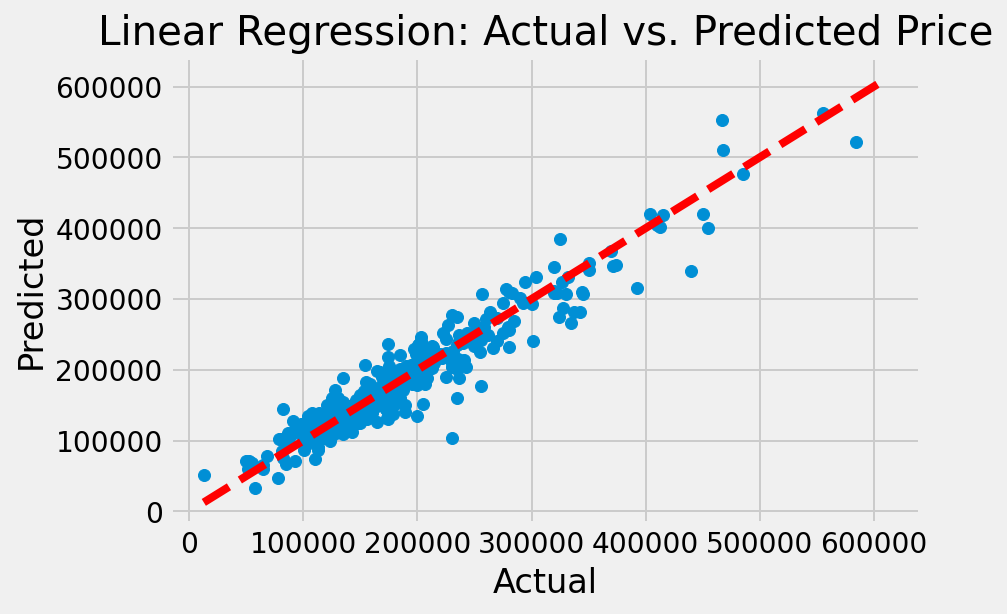

In [72]:
fig, ax = plt.subplots()
ax.scatter(y_test, lr_predict)
ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', color = 'r')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Linear Regression: Actual vs. Predicted Price")
plt.show();

<br>

<a id='section_1_2'></a>
# 1.2 LASSO
[(Back to Section 1 table of contents)](#section_1_table_of_contents)

In [73]:
pipe_lasso = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=False, include_bias=False)), 
    ('sc', StandardScaler()),
    ('lasso', LassoCV())
    ])

In [74]:
cross_val_score(pipe_lasso, X_train, y_train, cv = 5).mean()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683868590.5296631, tolerance: 677545865.5333889
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19908537989.5188, tolerance: 807773882.5362111
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1020857361.8077393, tolerance: 628417441.890248
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

0.8891963826370907

In [75]:
pipe_lasso.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175450846.0097656, tolerance: 819795331.9999665
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1669861833.3237305, tolerance: 819795331.9999665
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32869598344.076416, tolerance: 1018938744.578742
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('sc', StandardScaler()), ('lasso', LassoCV())])

In [76]:
cross_val_score(pipe_lasso, X_train, y_train, cv = 5).mean()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683868590.5296631, tolerance: 677545865.5333889
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19908537989.5188, tolerance: 807773882.5362111
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1020857361.8077393, tolerance: 628417441.890248
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

0.8891963826370907

In [77]:
pipe_lasso.score(X_train, y_train)

0.8974185765443303

In [78]:
pipe_lasso.score(X_test, y_test)

0.9210645424695298

In [815]:
pipe_lasso.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(include_bias=False)),
  ('sc', StandardScaler()),
  ('lasso', LassoCV())],
 'verbose': False,
 'poly': PolynomialFeatures(include_bias=False),
 'sc': StandardScaler(),
 'lasso': LassoCV(),
 'poly__degree': 2,
 'poly__include_bias': False,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'lasso__alphas': None,
 'lasso__copy_X': True,
 'lasso__cv': None,
 'lasso__eps': 0.001,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__n_alphas': 100,
 'lasso__n_jobs': None,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': 'auto',
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__verbose': False}

In [79]:
lasso_predict = pipe_lasso.predict(X_test)

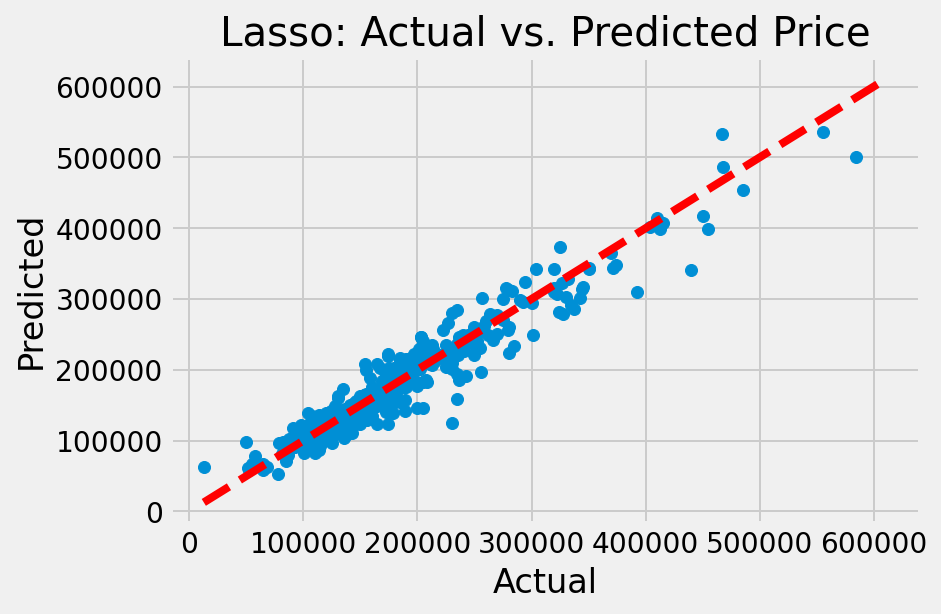

In [80]:
fig, ax = plt.subplots()
ax.scatter(y_test, lasso_predict)
ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', color = 'r')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Lasso: Actual vs. Predicted Price")
plt.show();

<br>

<a id='section_1_3'></a>
# 1.3 RIDGE
[(Back to Section 1 table of contents)](#section_1_table_of_contents)

In [81]:
pipe_ridge = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=False, include_bias=False)), 
    ('sc', StandardScaler()),
    ('ridge', RidgeCV())
    ])

In [82]:
cross_val_score(pipe_ridge, X_train, y_train, cv = 5).mean()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1421: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


0.888630817751566

In [83]:
pipe_ridge.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1421: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('sc', StandardScaler()),
                ('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [84]:
pipe_ridge.score(X_train, y_train)

0.9016416858141575

In [85]:
pipe_ridge.score(X_test, y_test)

0.9224181682611949

In [820]:
pipe_ridge.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(include_bias=False)),
  ('sc', StandardScaler()),
  ('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))],
 'verbose': False,
 'poly': PolynomialFeatures(include_bias=False),
 'sc': StandardScaler(),
 'ridge': RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
 'poly__degree': 2,
 'poly__include_bias': False,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'ridge__alpha_per_target': False,
 'ridge__alphas': array([ 0.1,  1. , 10. ]),
 'ridge__cv': None,
 'ridge__fit_intercept': True,
 'ridge__gcv_mode': None,
 'ridge__normalize': False,
 'ridge__scoring': None,
 'ridge__store_cv_values': False}

In [56]:
ridge_predict = pipe_ridge.predict(X_test)

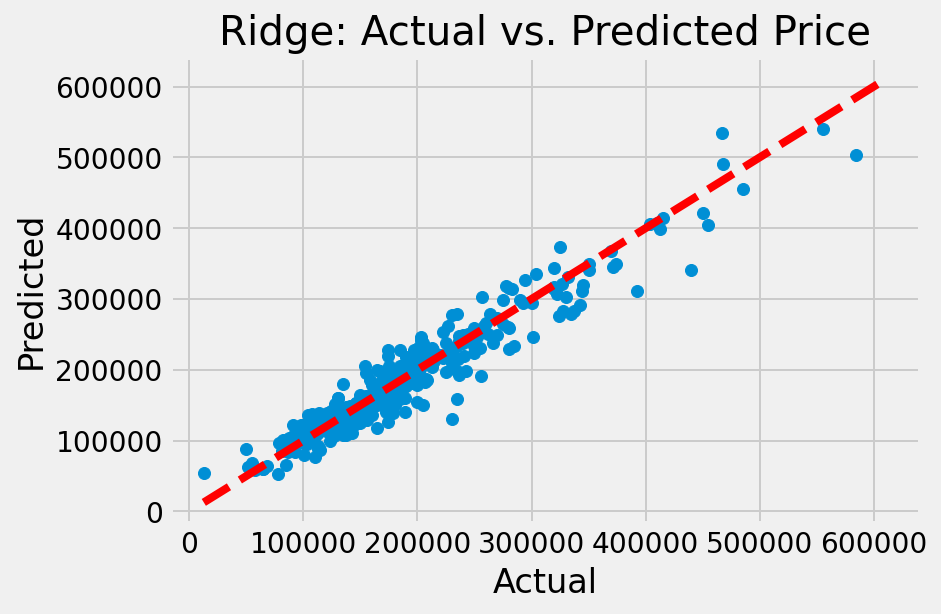

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, ridge_predict)
ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', color = 'r')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Ridge: Actual vs. Predicted Price")
plt.show();

<br>

<a id='section_1_4'></a>
# 1.4 KNN
[(Back to Section 1 table of contents)](#section_1_table_of_contents)

In [86]:
pipe_knn = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=False, include_bias=False)), 
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [87]:
cross_val_score(pipe_knn, X_train, y_train, cv = 5).mean()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.004279480868203177

In [88]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('sc', StandardScaler()), ('knn', KNeighborsClassifier())])

In [89]:
pipe_knn.score(X_train, y_train)

0.1852078239608802

In [90]:
pipe_knn.score(X_test, y_test)

0.007334963325183374

In [831]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(include_bias=False)),
  ('sc', StandardScaler()),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'poly': PolynomialFeatures(include_bias=False),
 'sc': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'poly__degree': 2,
 'poly__include_bias': False,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [91]:
knn_predict = pipe_knn.predict(X_test)

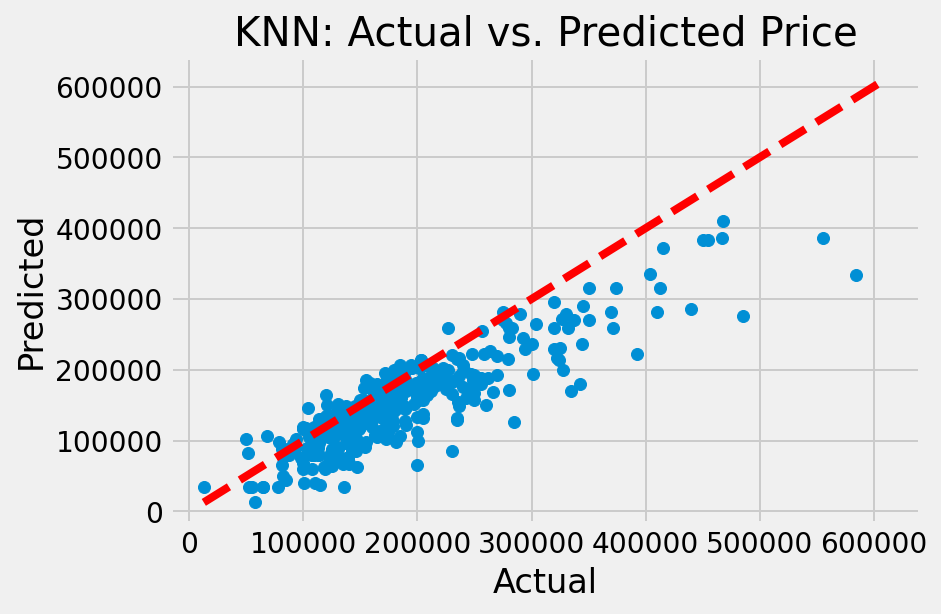

In [92]:
fig, ax = plt.subplots()
ax.scatter(y_test, knn_predict)
ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', color = 'r')
color = 'r'
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("KNN: Actual vs. Predicted Price")
plt.show();

<a id='section_1_1'></a>
# 1.5 Final Model Selection
[(Back to Section 1 table of contents)](#section_1_table_of_contents)

After looking at the seeing that Lasso and Ridge were pretty much even, I have decided to use the Ridge version because it's $R^2$ score was slightly higher. 

<br><br>

<a id='section_1'></a>
# SECTION 2: CLEANING THE TESTING DATA
[(Back to table of contents)](#table_of_contents)<br>

<a id='section_2_table_of_contents'></a>
## <b>Section 2 Table of Contents</b>
[2.1 Importing the Testing Data](#section_2_1)<br>
[2.2 Cleaing the Testing Data](#section_2_2)<br>
[2.3 Adding Additional Features to the Testing Data](#section_2_3)<br>
[2.4 Final Test Data Check](#section_2_4)<br>

<br>

# 2.1: IMPORTING THE TESTING DATA

In [9]:
kaggle_data = pd.read_csv('../datasets/test.csv')

In [833]:
training.shape

(2045, 91)

In [834]:
kaggle_data.shape #comparing the inital shape of the kaggle testing data to my copy of the training data

(878, 80)

In [835]:
training.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,mo_sold,yr_sold,sale_type,saleprice,indoor_sft,outdoor_sf,total_sf,total_baths,baths_above_ground,property_age,conditions,garage_all,in_sf_garage,in_sf_conditions,all_sf_conditions,neighbor_conditions,neighbor_conditions_total_sf,total_rooms
0,0,109,533352170,60,6,55.228571,13517,2,3,2,4,5,3,2,4,5,4,4,6,8,1976,2005,3,2,3,4,4,289.0,3,3,4,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,1,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,6,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,3,2010,6,130500,2204.0,44,2248.0,3.0,3,35,9,1992.0,4196.0,2213.0,2257.0,11,2259.0,9.0
1,1,544,531379050,60,6,43.000000,11492,2,3,2,4,5,3,4,5,5,4,4,7,5,1996,1997,3,2,4,5,4,132.0,3,3,6,4,3,1,6,637.0,1,0.0,276.0,913.0,5,5,1,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,6,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,4,2009,6,220000,3035.0,74,3109.0,4.0,3,15,10,2013.0,5048.0,3045.0,3119.0,14,3123.0,12.0
2,2,153,535304180,20,6,68.000000,7922,2,4,2,4,1,3,3,5,5,4,2,5,7,1953,2007,3,2,4,5,3,0.0,2,4,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,5,3,1,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,3,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,1,2010,6,109000,2114.0,52,2166.0,2.0,1,58,10,1964.0,4078.0,2124.0,2176.0,13,2179.0,7.0
3,3,318,916386060,60,6,73.000000,9802,2,4,2,4,1,3,6,5,5,4,4,5,5,2006,2007,3,2,4,5,3,0.0,2,3,6,4,3,1,1,0.0,1,0.0,384.0,384.0,5,4,1,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,7,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,4,2010,6,174000,1828.0,100,1928.0,3.0,3,5,10,2025.0,3853.0,1838.0,1938.0,16,1944.0,10.0
4,4,255,906425045,50,6,82.000000,14235,2,3,2,4,1,3,4,5,5,4,1,6,8,1900,1993,3,2,2,4,3,0.0,2,3,6,2,4,1,1,0.0,1,0.0,676.0,676.0,5,3,1,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,3,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,3,2010,6,138500,2121.0,59,2180.0,2.0,2,111,10,1969.0,4090.0,2131.0,2190.0,14,2194.0,8.0


In [836]:
training.drop('Unnamed: 0', axis=1, inplace=True)

In [838]:
kaggle_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [840]:
kaggle_data.columns = kaggle_data.columns.str.lower().str.replace(' ','_')

<br> 

<a id='section_2_2'></a>
# 2.2: CLEANING THE TESTING DATA
[(Back to Section 2 table of contents)](#section_2_table_of_contents)

Repeating all the cleaning steps that I initially did but in one 

In [ ]:
kaggle_data = kaggle_data[kaggle_data['electrical'].notna()] #removing an eletrical observation that had no value

In [841]:
#dropping columns
kaggle_data.drop('alley', axis=1, inplace=True)
kaggle_data.drop('pool_qc', axis=1, inplace=True)
kaggle_data.drop('pool_area', axis=1, inplace=True)
kaggle_data.drop('misc_feature', axis=1, inplace=True)
kaggle_data.drop('misc_val', axis=1, inplace=True)

#additional steps I took in the original cleaning process
kaggle_data["lot_frontage"] = kaggle_data.groupby('lot_config')['lot_frontage'].transform(lambda x: x.fillna(x.mean()))

#replacing nulls
kaggle_data['mas_vnr_type'] = kaggle_data['mas_vnr_type'].fillna('None')
kaggle_data['mas_vnr_area'] = kaggle_data['mas_vnr_area'].fillna(0)
kaggle_data['bsmt_exposure'] = kaggle_data['bsmt_exposure'].fillna('NA')
kaggle_data['bsmtfin_type_2'] = kaggle_data['bsmtfin_type_2'].fillna('NA')
kaggle_data['bsmt_qual'] = kaggle_data['bsmt_qual'].fillna('NA')
kaggle_data['bsmt_cond'] = kaggle_data['bsmt_cond'].fillna('NA')
kaggle_data['bsmtfin_type_1'] = kaggle_data['bsmtfin_type_1'].fillna('NA')
kaggle_data['bsmtfin_sf_1'] = kaggle_data['bsmtfin_sf_1'].fillna(0)
kaggle_data['bsmtfin_sf_2'] = kaggle_data['bsmtfin_sf_2'].fillna(0)
kaggle_data['bsmt_unf_sf'] = kaggle_data['bsmt_unf_sf'].fillna(0)
kaggle_data['total_bsmt_sf'] = kaggle_data['total_bsmt_sf'].fillna(0)
kaggle_data['bsmt_full_bath'] = kaggle_data['bsmt_full_bath'].fillna(0.0)
kaggle_data['bsmt_half_bath'] = kaggle_data['bsmt_half_bath'].fillna(0.0)
kaggle_data['fireplace_qu'] = kaggle_data['fireplace_qu'].fillna('NA')
kaggle_data['garage_type'] = kaggle_data['garage_type'].fillna('NA')
kaggle_data['garage_yr_blt'] = kaggle_data['garage_yr_blt'].fillna(-1)
kaggle_data['garage_finish'] = kaggle_data['garage_finish'].fillna('NA')
kaggle_data['garage_qual'] = kaggle_data['garage_qual'].fillna('NA')
kaggle_data['garage_cond'] = kaggle_data['garage_cond'].fillna('NA')
kaggle_data['fence'] = kaggle_data['fence'].fillna('NA')


In [842]:
kaggle_data['bsmt_cond'] = kaggle_data['bsmt_cond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
kaggle_data['bsmt_exposure'] = kaggle_data['bsmt_exposure'].map({'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0})
kaggle_data['bsmt_qual'] = kaggle_data['bsmt_qual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
kaggle_data['bsmtfin_type_1'] = kaggle_data['bsmtfin_type_1'].map({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0})
kaggle_data['bsmtfin_type_2'] = kaggle_data['bsmtfin_type_2'].map({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0})
kaggle_data['electrical'] = kaggle_data['electrical'].map({'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1})
kaggle_data['exter_cond'] = kaggle_data['exter_cond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
kaggle_data['exter_qual'] = kaggle_data['exter_qual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
kaggle_data['fence'] = kaggle_data['fence'].map({'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'NA' : 0})
kaggle_data['fireplace_qu'] = kaggle_data['fireplace_qu'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
kaggle_data['functional'] = kaggle_data['functional'].map({'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1})
kaggle_data['garage_cond'] = kaggle_data['garage_cond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
kaggle_data['garage_finish'] = kaggle_data['garage_finish'].map({'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NA' : 0})
kaggle_data['garage_qual'] = kaggle_data['garage_qual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
kaggle_data['heating_qc'] = kaggle_data['heating_qc'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
kaggle_data['kitchen_qual'] = kaggle_data['kitchen_qual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
kaggle_data['land_slope'] = kaggle_data['land_slope'].map({'Gtl' : 3, 'Mod' : 2, 'Sev' : 1})
kaggle_data['lot_shape'] = kaggle_data['lot_shape'].map({'Reg' : 4, 'IR1' : 3, 'IR2' : 2, 'IR3' : 1})
kaggle_data['paved_drive'] = kaggle_data['paved_drive'].map({'Y' : 3, 'P' : 2, 'N' : 1})
kaggle_data['utilities'] = kaggle_data['utilities'].map({'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1})

In [843]:
kaggle_data['bldg_type'] = kaggle_data['bldg_type'].map({'TwnhsE' : 5, '1Fam' : 4, 'Duplex' : 3, 'Twnhs' : 2, '2fmCon' : 1})
kaggle_data['central_air'] = kaggle_data['central_air'].map({'Y' : 1, 'N' : 0})
kaggle_data['condition_1'] = kaggle_data['condition_1'].map({'PosA' : 9, 'PosN' : 8, 'RRNn' : 7, 'RRAn' : 6, 'Norm' : 5, 'RRAe' : 4,
                                                             'Feedr' : 3, 'RRNe' : 2, 'Artery' : 1})
kaggle_data['condition_2'] = kaggle_data['condition_2'].map({'PosA' : 8, 'PosN' : 7, 'RRAe' : 6, 'Norm' : 5, 'RRAn' : 4, 'Feedr' : 3,
                                                             'Artery' : 2, 'RRNn' : 1})

kaggle_data['exterior_1st'] = kaggle_data['exterior_1st'].map({'ImStucc' : 5, 'Stone' : 5, 'CemntBd' : 5, 'VinylSd' : 4, 'BrkFace' : 4, 'BrkComm' : 4, 
                                                               'Plywood' : 3, 'HdBoard' : 3, 'MetalSd' : 3, 'WdShing' : 2, 'Wd Sdng' : 2, 'Stucco' : 2,
                                                               'AsbShng' : 1, 'CBlock' : 1, 'AsphShn' : 1, 'PreCast' : 1})
kaggle_data['exterior_2nd'] = kaggle_data['exterior_2nd'].map({'CmentBd' : 5, 'VinylSd' : 5, 'ImStucc' : 5, 'BrkFace' : 4, 'Plywood' : 4, 'HdBoard' : 4, 
                                                               'Brk Cmn' : 3, 'Stucco' : 3, 'Wd Shng' : 3, 'AsphShn' : 2, 'MetalSd' : 2, 'Wd Sdng' : 2,
                                                               'Stone' : 1, 'CBlock' : 1, 'AsbShng' : 1, 'PreCast' : 1, 'Other': 1})
kaggle_data['foundation'] = kaggle_data['foundation'].map({'PConc' : 6, 'Wood' : 5, 'CBlock' : 4, 'BrkTil' : 3, 'Stone' : 2, 'Slab' : 1})
kaggle_data['garage_type'] = kaggle_data['garage_type'].map({'BuiltIn' : 7, 'Attchd' : 6, '2Types' : 5, 'Basment' : 4, 'Detchd' : 3, 'NA': 2, 'CarPort' : 1})
kaggle_data['heating'] = kaggle_data['heating'].map({'GasA' : 5, 'GasW' : 4, 'OthW' : 3, 'Wall' : 2, 'Grav' : 1, 'Floor' : 1})
kaggle_data['house_style'] = kaggle_data['house_style'].map({'2.5Fin' : 4, '2Story' : 4, '2.5Unf' : 3, 'SLvl' : 3,
                                                             '1Story' : 2, 'SFoyer' : 2, '1.5Fin' : 1, '1.5Unf' : 1})
kaggle_data['land_contour'] = kaggle_data['land_contour'].map({'HLS' : 4, 'Low' : 3, 'Lvl' : 2, 'Bnk' : 1})
kaggle_data['lot_config'] = kaggle_data['lot_config'].map({'CulDSac' : 5, 'FR3' : 4, 'FR2' : 3, 'Corner' : 2, 'Inside' : 1})
kaggle_data['mas_vnr_type'] = kaggle_data['mas_vnr_type'].map({'Stone' : 5, 'BrkFace' : 4, 'None' : 3, 'BrkCmn' : 2, 'CBlock' : 1})
kaggle_data['ms_zoning'] = kaggle_data['ms_zoning'].map({'FV' : 7, 'RL' : 6, 'RH' : 5, 'RM' : 4, 'C (all)' : 3, 
                                                         'I (all)' : 2, 'A (agr)' : 1})
kaggle_data['neighborhood'] = kaggle_data['neighborhood'].map({'StoneBr' : 7, 'NridgHt' : 7, 'NoRidge' : 7, 'GrnHill' : 7,
                                                               'Veenker' : 6, 'ClearCr' : 6, 'Somerst' : 6, 'Timber' : 6,
                                                               'CollgCr' : 5, 'Crawfor' : 5, 'Blmngtn' : 5, 'Greens' : 5,
                                                               'NWAmes' : 4, 'SawyerW' : 4, 'Gilbert' : 4, 'Mitchel' : 4,
                                                               'NPkVill' : 3, 'NAmes' : 3, 'Blueste' : 3, 'Landmrk' : 3,
                                                               'SWISU' : 2, 'Sawyer' : 2, 'BrkSide' : 2, 'Edwards' : 2,
                                                               'OldTown' : 1, 'BrDale' : 1, 'IDOTRR' : 1, 'MeadowV' : 1})
kaggle_data['roof_matl'] = kaggle_data['roof_matl'].map({'WdShake' : 6, 'WdShngl' : 5, 'Membran' : 4, 'Tar&Grv' : 3, 'CompShg' : 2, 'ClyTile' : 1, 'Metal' : 1, 'Roll' : 1})
kaggle_data['roof_style'] = kaggle_data['roof_style'].map({'Shed' : 6, 'Hip' : 5, 'Flat' : 4, 'Gable' : 3, 'Mansard' : 2, 'Gambrel' : 1})
kaggle_data['sale_type'] = kaggle_data['sale_type'].map({'Con' : 9, 'New' : 8, 'CWD' : 7, 'WD ' : 6, 'Oth' : 5, 
                                                         'ConLD' : 4, 'COD' : 3, 'ConLI' : 2, 'ConLw' : 1, 'VWD' : 1})
kaggle_data['street'] = kaggle_data['street'].map({'Pave' : 2, 'Grvl' : 1})

<br>

<a id='section_2_3'></a>
# 2.3: ADDING ADDITIONAL FEATURES TO THE TESTING DATA
[(Back to Section 2 table of contents)](#section_2_table_of_contents)

In [844]:
#total indoor square footage of a property
kaggle_data['indoor_sft'] = kaggle_data['1st_flr_sf'] + kaggle_data['2nd_flr_sf'] + kaggle_data['total_bsmt_sf']

#total indoor square footage of a property
kaggle_data['outdoor_sf'] = kaggle_data['open_porch_sf'] + kaggle_data['wood_deck_sf']

#total indoor and out square footage of a property
kaggle_data['total_sf'] = kaggle_data['indoor_sft'] + kaggle_data['outdoor_sf']

#the log value of price to help with predictions
# kaggle_data['price_log'] = np.log(kaggle_data['saleprice'])

#total bathrooms
kaggle_data['total_baths'] = kaggle_data['full_bath'] + kaggle_data['half_bath'] + kaggle_data['bsmt_full_bath'] + kaggle_data['bsmt_half_bath']

#bathrooms above ground
kaggle_data['baths_above_ground'] = kaggle_data['full_bath'] + kaggle_data['half_bath']

#age of a property
kaggle_data['property_age'] = 2011 - kaggle_data['year_built']

#what sort of features a property is close to (parks, greenbelt, railways, etc.)
kaggle_data['conditions'] = kaggle_data['condition_1'] + kaggle_data['condition_2']

#all garage features combined
kaggle_data['garage_all'] = kaggle_data['garage_cars'] + kaggle_data['garage_cond'] + kaggle_data['garage_finish'] + kaggle_data['garage_qual'] + kaggle_data['garage_type'] + kaggle_data['garage_yr_blt']

#indoor square footage and garage_all combined
kaggle_data['in_sf_garage'] = kaggle_data['indoor_sft'] + kaggle_data['garage_all']
                            
#indoor square footage and area conditions
kaggle_data['in_sf_conditions'] = kaggle_data['indoor_sft'] + kaggle_data['conditions']

#all square footage and area conditions
kaggle_data['all_sf_conditions'] = kaggle_data['total_sf'] + kaggle_data['conditions'] 

#neighbors combined with surrounding conditions
kaggle_data['neighbor_conditions'] = kaggle_data['neighborhood'] + kaggle_data['conditions']

#neighbors combined with surrounding conditions and total square footage
kaggle_data['neighbor_conditions_total_sf'] = kaggle_data['neighborhood'] + kaggle_data['conditions'] + kaggle_data['total_sf']

#all rooms in total not including basements
kaggle_data['total_rooms'] = kaggle_data['totrms_abvgrd'] + kaggle_data['total_baths']

<br>

<a id='section_2_4'></a>
# 2.4: FINAL TEST DATA CHECK
[(Back to Section 2 table of contents)](#section_2_table_of_contents)

In [845]:
kaggle_data.shape

(878, 89)

In [878]:
kaggle_data.isnull().sum()

id                              0
pid                             0
ms_subclass                     0
ms_zoning                       0
lot_frontage                    0
lot_area                        0
street                          0
lot_shape                       0
land_contour                    0
utilities                       0
lot_config                      0
land_slope                      0
neighborhood                    0
condition_1                     0
condition_2                     0
bldg_type                       0
house_style                     0
overall_qual                    0
overall_cond                    0
year_built                      0
year_remod/add                  0
roof_style                      0
roof_matl                       0
exterior_1st                    0
exterior_2nd                    0
mas_vnr_type                    0
mas_vnr_area                    0
exter_qual                      0
exter_cond                      0
foundation    

kaggle_data.dtypes

In [ ]:
training.shape

In [847]:
kaggle_data.to_csv('datasets/test_clean.csv')#saving a cleaned version of the testing data

<br>

<a id='section_3'></a>
# SECTION 3: PREDICTION TIME
[(Back to table of contents)](#table_of_contents)<br>

In [849]:
X_kaggle_test = kaggle_data[['total_sf', 'overall_qual', 'exter_qual', 'kitchen_qual', 'garage_finish', 'bsmt_qual', 
                    'fireplace_qu', 'heating_qc', 'bsmtfin_type_1', 'bsmt_exposure', 'garage_qual', 'paved_drive',
                    'central_air', 'mas_vnr_type']]

In [850]:
pred = pipe_ridge.predict(X_kaggle_test)

In [851]:
pred

array([138592.92092986, 191181.8879424 , 182945.63201548, 109960.35907111,
       180932.29486531, 100003.69102538, 105571.8860631 , 166706.56237103,
       193073.16656598, 163517.97509745, 174713.06527562, 132901.30690306,
       170626.22274405, 289380.50444305, 150956.55335619, 125480.60523773,
       144831.00037411, 122070.68589413, 200150.57090031, 221544.62876222,
       168610.6649899 , 135852.72891679, 225561.28343974, 150217.96727248,
       192224.03171057, 113987.46676118, 134504.43315151, 130907.55014463,
       153238.92264303,  60464.98120096, 105427.04039627, 101989.09088296,
       300396.49573164, 165826.54767016, 239561.03320068, 159718.57913444,
       126014.18247123,  84288.23175207,  98145.95693714, 210453.21715072,
       150277.28808466, 216665.16363356, 143907.10336081, 171336.7437416 ,
       252547.00629607,  94112.60186944, 217693.86890341, 131730.48298217,
       130975.38934098, 122682.49707553, 116432.88679851, 210107.46253463,
       284024.98782953, 1

In [ ]:
kaggle_data['sale_type'].unique()

In [852]:
kaggle_data['SalePrice'] = pred

In [853]:
kaggle_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,mo_sold,yr_sold,sale_type,indoor_sft,outdoor_sf,total_sf,total_baths,baths_above_ground,property_age,conditions,garage_all,in_sf_garage,in_sf_conditions,all_sf_conditions,neighbor_conditions,neighbor_conditions_total_sf,total_rooms,SalePrice
0,2658,902301120,190,4,69.000000,9142,2,4,2,4,1,3,1,5,5,1,4,6,8,1910,1950,3,2,1,1,3,0.0,3,2,2,2,3,1,1,0,1,0,1020,1020,5,4,0,2.0,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,0,3,1910.0,1,1,440,1,1,3,0,60,112,0,0,0,4,2006,6,2948,60,3008,2,2,101,10,1917.0,4865.0,2958,3018,11,3019,11,138592.920930
1,2718,905108090,90,6,67.496377,9662,2,3,2,4,1,3,2,5,5,3,2,5,4,1977,1977,3,2,3,4,3,0.0,3,3,4,4,3,1,1,0,1,0,1967,1967,5,3,1,5.0,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,0,6,1977.0,3,2,580,3,3,3,170,0,0,0,0,0,8,2006,6,3934,170,4104,2,2,34,10,1994.0,5928.0,3944,4114,12,4116,12,191181.887942
2,2414,528218130,60,6,58.000000,17104,2,3,2,4,1,3,4,5,5,4,4,7,5,2006,2006,3,2,4,5,3,0.0,4,3,6,4,4,3,6,554,1,0,100,654,5,5,1,5.0,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,4,6,2006.0,2,2,426,3,3,3,100,24,0,0,0,0,9,2006,8,2150,124,2274,4,3,5,10,2022.0,4172.0,2160,2284,14,2288,11,182945.632015
3,1989,902207150,30,4,60.000000,8520,2,4,2,4,1,3,1,5,5,4,2,5,6,1923,2006,3,2,2,2,3,0.0,4,3,4,3,3,1,1,0,1,0,968,968,5,3,1,5.0,968,0,0,968,0,0,1,0,2,1,3,5,8,0,0,3,1935.0,1,2,480,2,3,1,0,0,184,0,0,0,7,2007,6,1936,0,1936,1,1,88,10,1946.0,3882.0,1946,1946,11,1947,6,109960.359071
4,625,535105100,20,6,67.496377,9500,2,3,2,4,1,3,3,5,5,4,2,6,5,1963,1963,3,2,3,4,4,247.0,3,3,4,4,3,1,4,609,1,0,785,1394,5,4,1,5.0,1394,0,0,1394,1,0,1,1,3,1,3,6,8,2,4,6,1963.0,2,2,514,3,3,3,0,76,0,0,185,0,7,2009,6,2788,76,2864,3,2,48,10,1979.0,4767.0,2798,2874,13,2877,9,180932.294865


In [854]:
kaggle_submission = kaggle_data[['id', 'SalePrice']]
head

,id,SalePrice
0,2658,138592.920930
1,2718,191181.887942


In [857]:
kaggle_submission.rename(columns = {'id':'Id'}, inplace = True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [858]:
kaggle_submission.head()

,Id,SalePrice
0,2658,138592.920930
1,2718,191181.887942
2,2414,182945.632015
3,1989,109960.359071
4,625,180932.294865


In [860]:
kaggle_submission.shape

(878, 2)

In [861]:
kaggle_submission.set_index('Id', inplace=True)

In [862]:
kaggle_submission.head()

,SalePrice
Id,
2658,138592.920930
2718,191181.887942
2414,182945.632015
1989,109960.359071
625,180932.294865


In [863]:
kaggle_submission.to_csv('datasets/kaggle_submission.csv') # saving data to submit to kaggle

## [Take me back to Part 1](../code/1_data_cleaning_and_eda.ipynb)